<a href="https://colab.research.google.com/github/Cloud-Dark/Simple-Data-Correlation-Tugas-2-Matrikulasi-Stuktur-Data-/blob/main/Data_Correlation_Struktur_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Correlation

##Step 1 : Importing the Library
Hal pertama yang harus dilakukan adalah meng-import beberapa Library Python untuk kebutuhan dataframe, visualisasi dan clustering, dengan langkah-langkah sebagai berikut:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Step 2 : Reading and Understanding the Data
Langkah selanjutnya, yaitu meng-input dataset. Dataset yang akan digunakan pada tulisan ini adalah dataset Pembelian Property. [Klik disini](https://raw.githubusercontent.com/Cloud-Dark/datacollection/main/melb_data_processed.csv) untuk mengakses dataset tersebut.

In [3]:
# Load dataset OnlineRetail
df = pd.read_csv( 'https://raw.githubusercontent.com/Cloud-Dark/datacollection/main/melb_data_processed.csv',
                 header = 0,
                 encoding = 'unicode_escape')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut memiliki 19 atribut, diantaranya: Suburb, Address, Rooms, Type, Price	Method, SellerG, Date	Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, CouncilArea, Lattitude, 	Longtitude, Regionname, Propertycount.

Untuk detail info dan statistika deskriptif terkait dataset tersebut dapat diperoleh pada output-output dibawah ini:

In [4]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(df)

------------------------------- SHAPE --------------------------------
Rows: 13580
Columns: 19
------------------------------- TYPES --------------------------------
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object
-------------------------------- HEAD --------------------------------
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0 

##Step 3: Data Cleansing

Untuk keperluan modul ini, kita akan melihat correlation pada column numeric saja. Buat dataframe baru yang menampung dataframe dengan type numeric.

In [5]:
df = df.drop(['Lattitude', 'Longtitude', 'Postcode'], axis=1)

##Step 4: Build Modelling

Kita akan melihat correlation pada column numeric saja. Buat dataframe baru yang menampung dataframe dengan type numeric.

Pertama definisikan array typedata numeric, dan gunakan untuk mengambil nama column dengan tipe data numeric.

In [ ]:
num_type = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = list(df.select_dtypes(include=num_type).columns)

Kemudian buat dataframe baru yang berisi column numeric value.

In [6]:
df_num = df[num_col]

Menampilkan Correlation data

##Step 5: Experiment
Terdapat 3 method untuk melihat data correlation, yaitu Pearson, Spearman dan Kendall. Namun pada kesempatan kali ini saya menggunakan methode Spearman

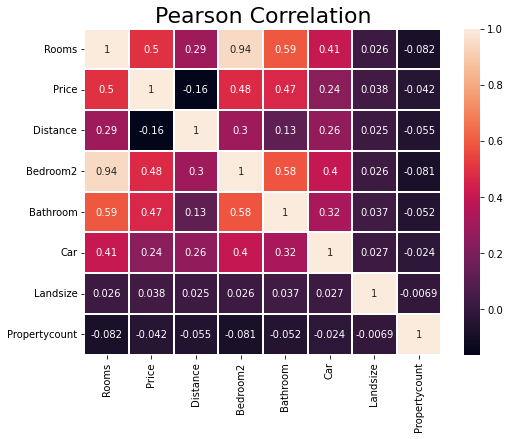

In [7]:
pearson_corr = df_num.corr(method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, linewidth=1, annot=True, annot_kws={'size':10})
plt.title('Pearson Correlation', fontsize=22)
plt.show()

##Step 6: Kesimpulan & Analisis
Correlation positif ditunjukan dengan warna yang lebih terang. Sementara correlation negatif akan ditunjukan dalam warna yang gelap.

Dapat dilihat Jumlah rooms, bedroom2, bathroom dan landsize berkolerasi positif dengan price. Yang berarti makin banyak ruangan, kamar tidur, kamar mandi atau ukuran tanah makin besar makan harga makin mahal.

Sementara distance menunjukan correlation negatif, makin jauh (makin besar nilai distance) dari pusat kota, makin murah harga rumah tersebut.